In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

In [2]:
table = pd.read_csv('data/OHD.dat')

(0, 2)

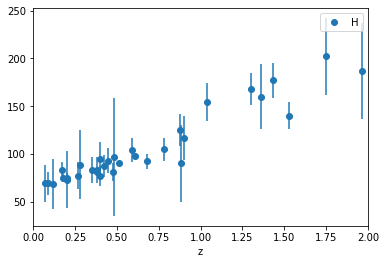

In [3]:
table.plot(x='z', y='H', yerr='uH', fmt='o')

plt.xlim(0, 2)

$$ r(t) = a(t)r_0, ~~~ H(t) = \frac{\dot{a}}{a} $$

$$ H^2(z) = H_0^2 [\Omega_{m0} (1+z)^3 + \Omega_{\Lambda 0}], ~~ \Omega_{m0} + \Omega_{\Lambda 0} = 1, (\text{flat}) $$

$$ H^2(z) = H_0^2 [\Omega_{m0} (1+z)^3 + \Omega_{k0} (1+z)^2 + \Omega_{\Lambda 0}], ~~ \Omega_{m0} + \Omega_{\Lambda 0} = 1 - \Omega_{k0}, (\text{curved}) $$

$$ H_0 = 100 h \frac{Km/s}{Mpc}, \rightarrow h = \frac{H_0}{100Km/s/Mpc} $$

Likelihood:

$$ L(h, \Omega_{m0}, \Omega_{\Lambda 0}) = \prod_i^N L_i(z_i, h, \Omega_{m0}, \Omega_{\Lambda 0}) $$

$ \epsilon = H(z_i, h, \Omega_{m0}, \Omega_{\Lambda 0}) - H_i \sim \sigma_H N(0,1)$

$$ L_i(z_i, h, \Omega_{m0}, \Omega_{\Lambda 0}) = \frac{1}{\sqrt{2\pi}\sigma_H} \exp\{-\frac{(H(z_i, h, \Omega_{m0}, \Omega_{\Lambda 0}) - H_i)^2}{2\sigma_H^2}\} $$

$$ L(h, \Omega_{m0}, \Omega_{\Lambda 0}) = \frac{1}{\sqrt{2\pi}\prod_i\sigma_{Hi}} \exp\{-\sum_i\frac{(H(z_i, h, \Omega_{m0}, \Omega_{\Lambda 0}) - H_i)^2}{2\sigma_H^2}\} $$

$$ -2 \log{L} = \sum_i\frac{(H(z_i, h, \Omega_{m0}, \Omega_{\Lambda 0}) - H_i)^2}{\sigma_H^2} + C$$

minimizar

$$ \chi^2 = \sum_i\frac{(H(z_i, h, \Omega_{m0}, \Omega_{\Lambda 0}) - H_i)^2}{\sigma_H^2} $$

In [4]:
def Hubble(z, h, Om, Ol):
    
    Ok = 1 - Om - Ol
    q = 1+z
    
    Esq = Om*q**3 + Ok*q**2 + Ol
    
    if np.all(Esq > 0) and h > 0:
        
        H0 = 100*h
    
        return H0*np.sqrt(Esq)
    
    return 0

In [5]:
q = (Hubble(table.z, .7, .3, .7) - table.H)/table.uH

(q**2).sum()

20.09978088683653

In [6]:
q@q

20.099780886836534

In [7]:
def chisq(h, Om, Ol):
    
    q = (Hubble(table.z, h, Om, Ol) - table.H)/table.uH
    
    return q@q

In [8]:
from iminuit import Minuit

In [9]:
m = Minuit(chisq, h=.7, Om=.3, Ol=.7, limit_h=(0,1),
       limit_Om=(0,1), limit_Ol=(0,1))

/home/marcelo/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: InitialParamWarning: Parameter h is floating but does not have initial step size. Assume 1.
  
/home/marcelo/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: InitialParamWarning: Parameter Om is floating but does not have initial step size. Assume 1.
  
/home/marcelo/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: InitialParamWarning: Parameter Ol is floating but does not have initial step size. Assume 1.
  
/home/marcelo/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: InitialParamWarning: errordef is not given. Default to 1.
  


In [10]:
m.migrad()

------------------------------------------------------------------
| FCN = 15.74                   |      Ncalls=62 (62 total)      |
| EDM = 8.5E-06 (Goal: 1E-05)   |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | h    |   0.67    |   0.04    |            |            |    0    |    1    |       |
| 1 | Om   |   0.37    |   0.16    |            |            |    0    |    1    |       |
| 2 | Ol   |   0.70    |   0.29    |            |            |    0    |    1    |       |
------------------------------------------------------------------------------------------

In [11]:
from getdist import plots, MCSamples
from getdist.gaussian_mixtures import GaussianND

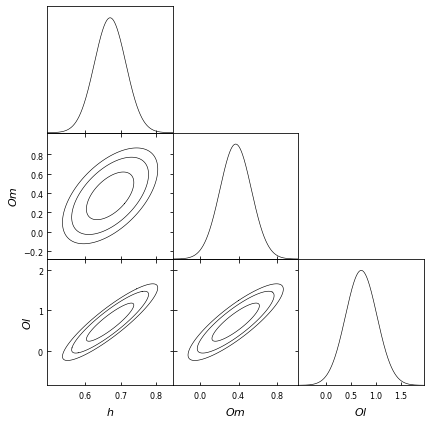

In [12]:
covariance = np.array(m.matrix())
mean = np.array([m.values[p] for p in m.parameters])

gauss=GaussianND(mean, covariance, labels=m.parameters)

g = plots.get_subplot_plotter()
g.settings.num_plot_contours = 3
g.triangle_plot(gauss,filled=False)

In [13]:
h = np.linspace(0.4, 1.0, 30)
Om = np.linspace(0.0, 1.0, 30)
Ol = np.linspace(0.0, 1.0, 30)

In [14]:
H, OM, OL = np.meshgrid(h, Om, Ol)

In [15]:
vchisq = np.vectorize(chisq)

In [16]:
grid = vchisq(H, OM, OL)

KeyboardInterrupt: 

In [17]:
grid.shape

NameError: name 'grid' is not defined

In [18]:
from getdist.densities import DensityND

In [19]:
points = np.row_stack([H.ravel(), OM.ravel(), OL.ravel()])

In [20]:
points

array([[0.4       , 0.4       , 0.4       , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.03448276, 0.06896552, ..., 0.93103448, 0.96551724,
        1.        ]])

In [21]:
density = DensityND(points, grid.ravel())

NameError: name 'grid' is not defined

In [22]:
density

NameError: name 'density' is not defined

In [23]:
import emcee

In [24]:
def log_prob(x):
    
    h, Om, Ol = x
    
    x = -0.5*chisq(h, Om, Ol)
    
    if np.isfinite(x):
        return x
    
    return -1e30

In [25]:
ndim, nwalkers = 3, 100
p0 = np.random.random(size=(nwalkers, ndim))

In [26]:
p0.shape

(100, 3)

In [27]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob,
                                threads=4)

In [28]:
sampler.run_mcmc(p0, 10000, progress=True)

100%|██████████| 10000/10000 [45:43<00:00,  3.64it/s] 


State([[ 0.6789758   0.35482102  0.68183996]
 [ 0.60612251  0.27875644  0.25495594]
 [ 0.64683509  0.44742525  0.65885118]
 [ 0.66800891  0.28576928  0.57869709]
 [ 0.68898334  0.31058421  0.72278949]
 [ 0.70804227  0.52499215  1.0237209 ]
 [ 0.71591177  0.6876007   1.17591964]
 [ 0.72080606  0.55811455  1.072386  ]
 [ 0.686231    0.55666638  0.99243128]
 [ 0.59295017  0.41969493  0.29095221]
 [ 0.67633921  0.44608666  0.79700776]
 [ 0.68366323  0.48201883  0.92338872]
 [ 0.5579416   0.2447307  -0.09649672]
 [ 0.6136361  -0.01376168  0.00300572]
 [ 0.61911219  0.31246552  0.39332319]
 [ 0.6439189   0.65414217  0.88843505]
 [ 0.70129994  0.58326677  1.04694207]
 [ 0.56092149  0.30319412 -0.0160585 ]
 [ 0.65989585  0.49554963  0.769353  ]
 [ 0.58609293  0.03310999 -0.05552085]
 [ 0.61719913  0.04300463  0.14554919]
 [ 0.61932975  0.03201951  0.15015102]
 [ 0.63465254  0.36972737  0.52336691]
 [ 0.69395844  0.54908975  0.9784104 ]
 [ 0.65252839  0.3783934   0.68097617]
 [ 0.64381267  0.48

In [29]:
sample = sampler.get_chain(flat=True)

In [30]:
n, dim = sample.shape

In [31]:
nsample = sample[n//5:]

In [33]:
MCSamples?

In [40]:
mcsamples = MCSamples(samples=nsample)

Removed no burn in


In [41]:
mcsamples.removeBurn()

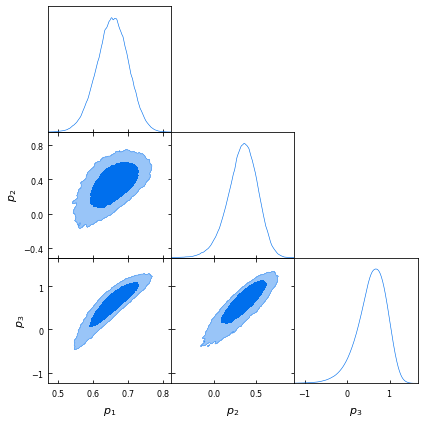

In [42]:
g = plots.get_subplot_plotter()
g.triangle_plot(mcsamples, filled=True, markers='.')

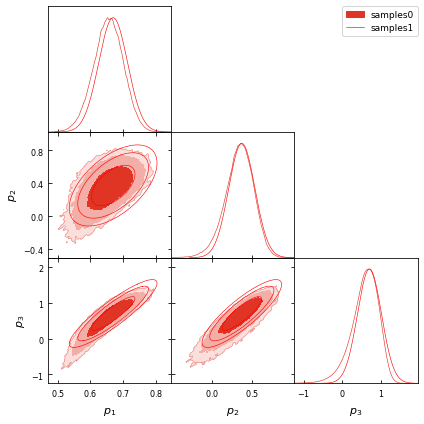

In [43]:
covariance = np.array(m.matrix())
mean = np.array([m.values[p] for p in m.parameters])

gauss=GaussianND(mean, covariance, labels=m.parameters)

g = plots.get_subplot_plotter()
g.settings.num_plot_contours = 3
g.triangle_plot([mcsamples, gauss],filled=[True, False])

In [ ]:
sam